In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
#Importing data
df = pd.read_csv('Stock Price Data.csv')
df.set_index(df["Date"])
df_submission = pd.read_csv("Sample Submission.csv")

In [3]:
df_close = df.filter(["Date", "Close"])
con = [df_close, df_submission]
df_close = df_close.append(df_submission,ignore_index=True, sort=False)
df_close.set_index(df_close["Date"])


,Date,Close
Date,,
31/12/2009,31/12/2009,36.998249
4/01/2010,4/01/2010,37.234500
5/01/2010,5/01/2010,37.162500
6/01/2010,6/01/2010,37.133251
7/01/2010,7/01/2010,37.059000
...,...,...
22/05/2020,22/05/2020,100.000000
26/05/2020,26/05/2020,100.000000
27/05/2020,27/05/2020,100.000000


Text(0, 0.5, 'Close ($)')

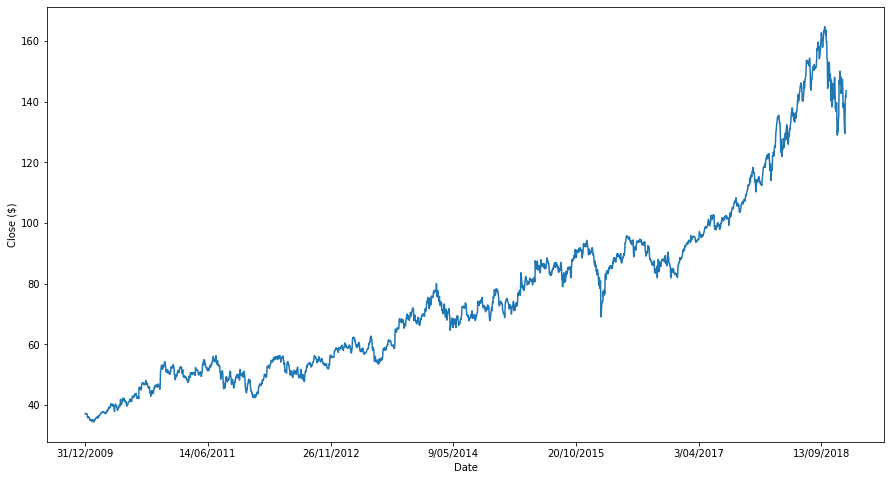

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,len(df), 365), df['Date'][0:2264:365])
plt.xlabel("Date")
plt.ylabel("Close ($)")

/Users/yonglertang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  
/Users/yonglertang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/yonglertang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/Users/yonglertang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0, 0.5, 'Close ($)')

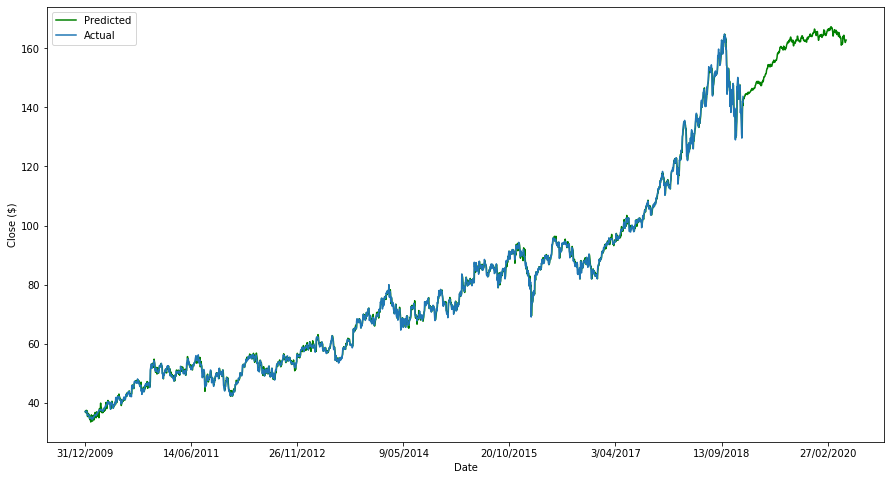

In [18]:
train_data, test_data = df[0:int(len(df)*0.60)], df[int(len(df)*0.60):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

train_data = df[0:int(len(df))]
training_data = train_data['Close'].values

model = ExponentialSmoothing(training_data, trend='add',seasonal = "add", seasonal_periods = 365, damped=False)
hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred_data1 = hw_model.predict(int(len(df)*0.60), 2264)
pred_data2 = hw_model.predict(0, 2619)

plt.figure(figsize = (15,8))

plt.xticks(np.arange(0,2620, 365), df_close['Date'][0:2620:365])
plt.plot(df_close["Date"], pred_data2, color='green', label='Predicted')
plt.plot(df["Date"], df["Close"], label='Actual')
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Close ($)")

In [13]:
RMSE_error = math.sqrt(mean_squared_error(test_data, pred_data1))
print(RMSE_error)

1.4708213163414796


In [14]:
lst = pred_data2[len(df):]
data2 = df_submission["Date"]
df1= pd.DataFrame({'Date':data2, 'Close':lst})

In [15]:
df1

,Date,Close
0,2/01/2019,142.893752
1,3/01/2019,143.079261
2,4/01/2019,142.867576
3,7/01/2019,143.455443
4,8/01/2019,143.573859
...,...,...
350,22/05/2020,162.569576
351,26/05/2020,161.941964
352,27/05/2020,162.280485
353,28/05/2020,162.557422


In [16]:
df1.to_csv("EMA Data2.csv", index = False)